In [1]:
import pandas as pd
import sqlite3
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
import xgboost as xgb

conn = sqlite3.connect(r'C:\Users\Owner\dev\algobetting\infra\data\db\algobetting.db')

df = pd.read_sql_query("""
                    SELECT DISTINCT
                        f.*,
                        ms.passing_corner_kicks as corner_kicks,
                        ms.opp_passing_corner_kicks as opp_corner_kicks
                    FROM 
                        team_all_features_365_005 f
                    JOIN
                        fbref_match_summary_v2 ms
                            ON ms.match_url = f.match_url
                            AND ms.team = f.team
                    WHERE 
                        f.team_rolling_summary_minutes IS NOT NULL
                        AND NOT (f.`is_promoted?` = 1 AND f.`is_early_season?` = 1)
                       """, conn)

df

,match_url,match_date,season,division,team,opp_team,is_home,gw,is_promoted?,is_early_season?,...,opp_team_rolling_conceded_defense_challenge_tackles_pct,opp_team_rolling_conceded_defense_challenges_lost,opp_team_rolling_conceded_defense_blocked_shots,opp_team_rolling_conceded_defense_blocked_passes,opp_team_rolling_conceded_defense_tackles_interceptions,opp_team_rolling_conceded_defense_clearances,opp_team_rolling_conceded_defense_errors,opp_team_rolling_conceded_keeper_psxg,corner_kicks,opp_corner_kicks
0,https://fbref.com/en/matches/e4bb1c35/Tottenha...,2025-05-25 00:00:00,2024-2025,Premier League,Tottenham,Brighton,1,38,0,0,...,50.720617,8.796946,3.393454,7.020603,26.403010,27.177737,0.862971,1.299603,2.0,11.0
1,https://fbref.com/en/matches/e4bb1c35/Tottenha...,2025-05-25 00:00:00,2024-2025,Premier League,Brighton,Tottenham,0,38,0,0,...,57.889854,7.949406,3.378971,9.378588,32.038948,23.558919,0.911136,1.805191,11.0,2.0
2,https://fbref.com/en/matches/1ff370e8/Bournemo...,2025-05-25 00:00:00,2024-2025,Premier League,Bournemouth,Leicester City,1,38,0,0,...,53.893970,6.606014,2.506894,6.904780,22.901258,21.697324,0.636969,1.811285,6.0,1.0
3,https://fbref.com/en/matches/1ff370e8/Bournemo...,2025-05-25 00:00:00,2024-2025,Premier League,Leicester City,Bournemouth,0,38,1,0,...,49.279905,7.520887,4.153870,6.746572,23.732322,26.770789,1.451179,1.460762,1.0,6.0
4,https://fbref.com/en/matches/36844e73/Newcastl...,2025-05-25 00:00:00,2024-2025,Premier League,Newcastle Utd,Everton,1,38,0,0,...,53.064874,6.895930,2.600829,6.075265,24.063503,26.142993,0.567784,1.251694,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39901,https://fbref.com/en/matches/e8e75a75/Como-Cag...,2022-08-13 00:00:00,2022-2023,Serie B,Como,Cagliari,1,1,0,1,...,47.905175,6.408071,3.518286,6.676135,21.826232,17.942850,0.219500,1.367898,6.0,5.0
39902,https://fbref.com/en/matches/e8e75a75/Como-Cag...,2022-08-13 00:00:00,2022-2023,Serie B,Cagliari,Como,0,1,0,1,...,42.604852,8.589310,2.172112,6.611274,23.664988,14.871051,0.075024,1.541054,5.0,6.0
39903,https://fbref.com/en/matches/99979e25/Cittadel...,2022-08-13 00:00:00,2022-2023,Serie B,Cittadella,Pisa,1,1,0,1,...,47.089937,7.713670,2.909231,6.588752,27.403947,19.741195,0.237578,1.160446,5.0,5.0
39904,https://fbref.com/en/matches/99979e25/Cittadel...,2022-08-13 00:00:00,2022-2023,Serie B,Pisa,Cittadella,0,1,0,1,...,50.507986,5.815970,3.866474,9.173457,27.363966,20.635355,0.149176,0.957865,5.0,5.0


In [2]:
final_df = df

In [3]:
final_df["outcome_over"] = np.where(final_df["corner_kicks"] > 5.5, 1, 0)

final_df

,match_url,match_date,season,division,team,opp_team,is_home,gw,is_promoted?,is_early_season?,...,opp_team_rolling_conceded_defense_challenges_lost,opp_team_rolling_conceded_defense_blocked_shots,opp_team_rolling_conceded_defense_blocked_passes,opp_team_rolling_conceded_defense_tackles_interceptions,opp_team_rolling_conceded_defense_clearances,opp_team_rolling_conceded_defense_errors,opp_team_rolling_conceded_keeper_psxg,corner_kicks,opp_corner_kicks,outcome_over
0,https://fbref.com/en/matches/e4bb1c35/Tottenha...,2025-05-25 00:00:00,2024-2025,Premier League,Tottenham,Brighton,1,38,0,0,...,8.796946,3.393454,7.020603,26.403010,27.177737,0.862971,1.299603,2.0,11.0,0
1,https://fbref.com/en/matches/e4bb1c35/Tottenha...,2025-05-25 00:00:00,2024-2025,Premier League,Brighton,Tottenham,0,38,0,0,...,7.949406,3.378971,9.378588,32.038948,23.558919,0.911136,1.805191,11.0,2.0,1
2,https://fbref.com/en/matches/1ff370e8/Bournemo...,2025-05-25 00:00:00,2024-2025,Premier League,Bournemouth,Leicester City,1,38,0,0,...,6.606014,2.506894,6.904780,22.901258,21.697324,0.636969,1.811285,6.0,1.0,1
3,https://fbref.com/en/matches/1ff370e8/Bournemo...,2025-05-25 00:00:00,2024-2025,Premier League,Leicester City,Bournemouth,0,38,1,0,...,7.520887,4.153870,6.746572,23.732322,26.770789,1.451179,1.460762,1.0,6.0,0
4,https://fbref.com/en/matches/36844e73/Newcastl...,2025-05-25 00:00:00,2024-2025,Premier League,Newcastle Utd,Everton,1,38,0,0,...,6.895930,2.600829,6.075265,24.063503,26.142993,0.567784,1.251694,12.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39901,https://fbref.com/en/matches/e8e75a75/Como-Cag...,2022-08-13 00:00:00,2022-2023,Serie B,Como,Cagliari,1,1,0,1,...,6.408071,3.518286,6.676135,21.826232,17.942850,0.219500,1.367898,6.0,5.0,1
39902,https://fbref.com/en/matches/e8e75a75/Como-Cag...,2022-08-13 00:00:00,2022-2023,Serie B,Cagliari,Como,0,1,0,1,...,8.589310,2.172112,6.611274,23.664988,14.871051,0.075024,1.541054,5.0,6.0,0
39903,https://fbref.com/en/matches/99979e25/Cittadel...,2022-08-13 00:00:00,2022-2023,Serie B,Cittadella,Pisa,1,1,0,1,...,7.713670,2.909231,6.588752,27.403947,19.741195,0.237578,1.160446,5.0,5.0,0
39904,https://fbref.com/en/matches/99979e25/Cittadel...,2022-08-13 00:00:00,2022-2023,Serie B,Pisa,Cittadella,0,1,0,1,...,5.815970,3.866474,9.173457,27.363966,20.635355,0.149176,0.957865,5.0,5.0,0


In [4]:
X = final_df.drop(columns=["team", "opp_team", "match_url", "match_date", "corner_kicks", "opp_corner_kicks", "outcome_over"])
# Use dummies for nominal categorical features
X = pd.get_dummies(X, columns=["season", "division"], drop_first=True)
y = final_df["outcome_over"]

# Use matches after a certain date as test
cutoff_date = '2024-08-01'  # adjust as needed
final_df['match_date'] = pd.to_datetime(final_df['match_date'])

train_mask = final_df['match_date'] < cutoff_date
test_mask = final_df['match_date'] >= cutoff_date

X_train = X[train_mask]
X_test = X[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]  

In [5]:
y_test.shape[0]

5222

In [6]:
# Calculate scale_pos_weight (negative samples / positive samples)
scale_pos_weight =  3366 / 1856  # ≈ 1.81

# Train XGBoost classifier with class balancing
model = xgb.XGBClassifier(
    enable_categorical=True, 
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.613

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      3366
           1       0.45      0.40      0.42      1856

    accuracy                           0.61      5222
   macro avg       0.57      0.56      0.57      5222
weighted avg       0.60      0.61      0.61      5222



In [7]:
# Get feature importance as text
feature_importance = model.get_booster().get_score(importance_type='weight')
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance (by weight):")
print("-" * 40)
for feature, importance in sorted_features:
    print(f"{feature:<25} {importance:>10}")

Feature Importance (by weight):
----------------------------------------
team_rolling_conceded_defense_errors       41.0
team_rolling_pass_types_passes_switches       35.0
team_rolling_conceded_pass_types_through_balls       35.0
opp_team_rolling_misc_aerials_won_pct       35.0
team_rolling_misc_offsides       34.0
opp_team_rolling_misc_pens_won       34.0
opp_team_rolling_conceded_summary_pens_made       34.0
team_rolling_summary_cards_yellow       33.0
opp_team_rolling_conceded_pass_types_corner_kicks       33.0
team_rolling_misc_aerials_won_pct       32.0
opp_team_rolling_summary_cards_yellow       32.0
team_rolling_possession_touches_def_3rd       31.0
team_rolling_misc_crosses       31.0
team_rolling_conceded_defense_clearances       31.0
opp_team_rolling_misc_cards_yellow_red       31.0
opp_team_rolling_pass_types_corner_kicks_out       31.0
opp_team_rolling_defense_blocked_shots       31.0
team_rolling_misc_pens_won       30.0
team_rolling_pass_types_corner_kicks_in       30.0
t

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import pickle
import os
import optuna
import numpy as np

# Quick toggle - set to True to run search, False to load existing model
RUN_OPTUNA_SEARCH = False  # Change to False if you want to load existing model

model_file = 'best_xgb_corner_model_over_optuna.pkl'

def objective(trial):
    # Define VERY STRICT parameter search space to prevent overfitting
    params = {
        'random_state': 42,
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 8.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
    }
    
    # Create model for classification (over/under corners)
    # If you want to predict exact corner count, change to XGBRegressor with objective='count:poisson'
    model = xgb.XGBClassifier(**params)
    
    # Use cross-validation for evaluation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    return cv_scores.mean()

if RUN_OPTUNA_SEARCH or not os.path.exists(model_file):
    print("Running Optuna optimization with STRICT regularization for corner prediction...")
    print("Parameter ranges designed to prevent overfitting:")
    print("- max_depth: 2-4 (very shallow)")
    print("- reg_alpha: 1.0-10.0 (strong L1)")
    print("- reg_lambda: 3.0-15.0 (very strong L2)")
    print("- colsample_bytree: 0.3-0.7 (heavy feature sampling)")
    print("- min_child_weight: 5-20 (large minimum samples)")
    
    # Create study
    study = optuna.create_study(direction='maximize')
    
    # Optimize
    study.optimize(objective, n_trials=125)  # More trials since we want best regularization
    
    print(f"\nBest trial: {study.best_trial.number}")
    print(f"Best value (accuracy): {study.best_value:.4f}")
    print(f"Best params: {study.best_params}")
    
    # Check if parameters are appropriately strict
    best_params = study.best_params
    print(f"\nRegularization strength check:")
    print(f"- max_depth: {best_params['max_depth']} (good if ≤4)")
    print(f"- reg_lambda: {best_params['reg_lambda']:.2f} (good if ≥5)")
    print(f"- colsample_bytree: {best_params['colsample_bytree']:.2f} (good if ≤0.6)")
    print(f"- min_child_weight: {best_params['min_child_weight']} (good if ≥5)")
    
    # Train final model with best parameters
    model = xgb.XGBClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)
    
    # Save model
    with open(model_file, 'wb') as f:
        pickle.dump(model, f)
    
    print(f"\nModel saved to {model_file}")
    
else:
    print(f"Loading existing model from {model_file}")
    with open(model_file, 'rb') as f:
        model = pickle.load(f)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)

print(f"\nFinal Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show final model parameters
print(f"\nFinal model parameters:")
final_params = model.get_params()
key_params = ['max_depth', 'learning_rate', 'n_estimators', 'reg_alpha', 'reg_lambda', 
              'colsample_bytree', 'subsample', 'min_child_weight', 'gamma']

for param in key_params:
    if param in final_params:
        value = final_params[param]
        print(f"{param}: {value}")

# Feature importance (top 15 only to avoid clutter)
if hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 15 Feature Importances:")
    print("=" * 60)
    for i, (_, row) in enumerate(importance_df.head(15).iterrows()):
        print(f"{i+1:2d}. {row['feature']:<40} {row['importance']:.4f}")


Loading existing model from best_xgb_corner_model_over_optuna.pkl

Final Model Performance:
Accuracy: 0.6676

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.77      3366
           1       0.57      0.27      0.37      1856

    accuracy                           0.67      5222
   macro avg       0.63      0.58      0.57      5222
weighted avg       0.65      0.67      0.63      5222


Final model parameters:
max_depth: 3
learning_rate: 0.05018704739783774
n_estimators: 100
reg_alpha: 2.502968477279479
reg_lambda: 6.834483593958122
colsample_bytree: 0.8309521144216929
subsample: 0.7293013218098673
min_child_weight: 10
gamma: 0.6226222931412906

Top 15 Feature Importances:
 1. team_rolling_summary_progressive_passes  0.0334
 2. team_rolling_passing_corner_kicks        0.0281
 3. opp_team_rolling_conceded_pass_types_crosses 0.0262
 4. team_rolling_possession_touches_att_3rd  0.0220
 5. opp_team_rolling_conceded_summa

In [13]:
test_predictions = model.predict(X_test)
test_proba = model.predict_proba(X_test)

# Create dataframe with test set results
full_test_df = final_df.loc[X_test.index].copy()
full_test_df['predicted_is_won'] = test_predictions
full_test_df['prob_win'] = test_proba[:, 1]  # Probability of winning

full_test_df = full_test_df[["match_url", "match_date", "season", "division", 
                    "team", "opp_team", "is_home", "gw", "is_promoted?", "is_early_season?",
                    "corner_kicks", "outcome_over", "predicted_is_won", "prob_win"]].dropna()

full_test_df.to_csv("corners_over_5.5.csv", index=False)

C:\Users\Owner\AppData\Local\Temp\ipykernel_22112\4078996453.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df_cal.groupby('prob_bin').agg({


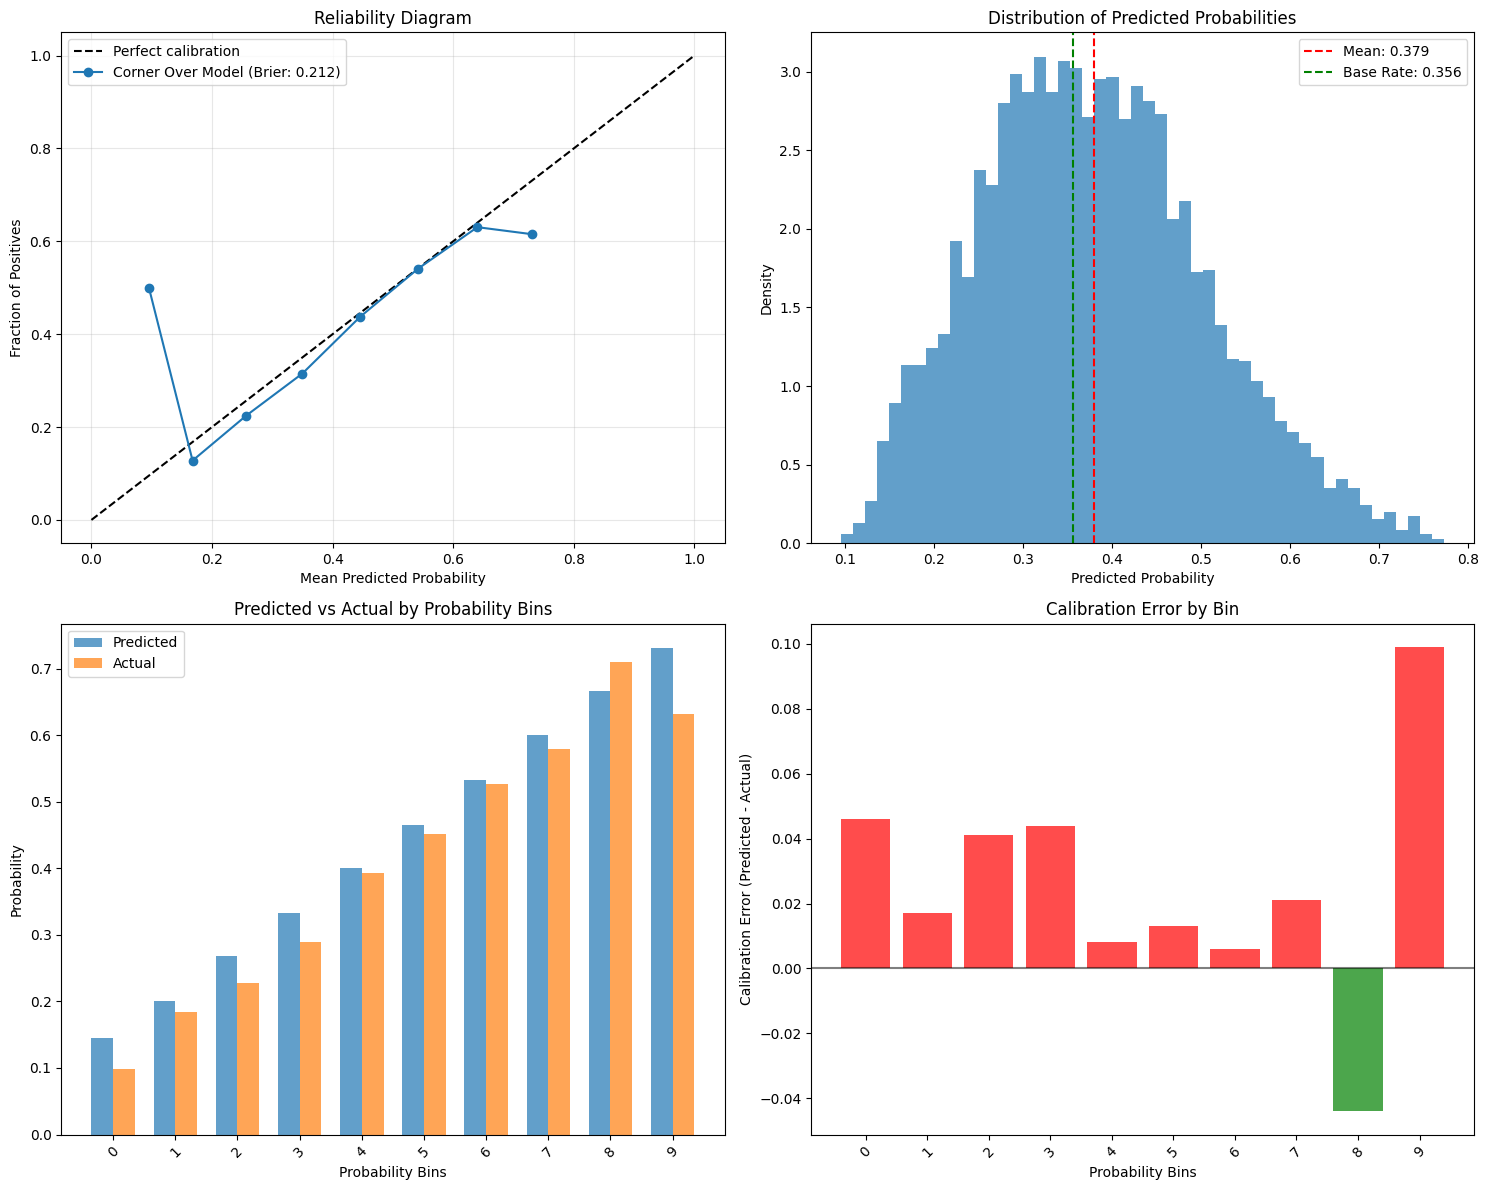


=== CALIBRATION ANALYSIS FOR CORNER OVER MODEL ===
Brier Score: 0.2118 (lower is better)
Log Loss: 0.6122 (lower is better)
Overall Predicted Mean: 0.379
Overall Actual Rate: 0.356
Mean Absolute Calibration Error: 0.0339

Detailed Bin Analysis:
Bin | Range | Count | Predicted | Actual | Error
-------------------------------------------------------
 0  | 0.09-0.16 |   141 |    0.145 |  0.099 |  0.046
 1  | 0.16-0.23 |   478 |    0.201 |  0.184 |  0.017
 2  | 0.23-0.30 |   858 |    0.268 |  0.227 |  0.041
 3  | 0.30-0.37 |  1056 |    0.333 |  0.289 |  0.044
 4  | 0.37-0.43 |  1008 |    0.401 |  0.393 |  0.008
 5  | 0.43-0.50 |   814 |    0.465 |  0.452 |  0.013
 6  | 0.50-0.57 |   459 |    0.533 |  0.527 |  0.006
 7  | 0.57-0.64 |   255 |    0.601 |  0.580 |  0.021
 8  | 0.64-0.71 |   107 |    0.666 |  0.710 | -0.044
 9  | 0.71-0.77 |    38 |    0.731 |  0.632 |  0.099


(          prob_bin  Mean_Predicted  Count  Actual_Rate
 0  (0.0936, 0.163]           0.145    141        0.099
 1   (0.163, 0.231]           0.201    478        0.184
 2   (0.231, 0.299]           0.268    858        0.227
 3   (0.299, 0.367]           0.333   1056        0.289
 4   (0.367, 0.434]           0.401   1008        0.393
 5   (0.434, 0.502]           0.465    814        0.452
 6    (0.502, 0.57]           0.533    459        0.527
 7    (0.57, 0.638]           0.601    255        0.580
 8   (0.638, 0.706]           0.666    107        0.710
 9   (0.706, 0.774]           0.731     38        0.632,
 0.21175525680427187,
 0.6121651428820479)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, log_loss
import seaborn as sns

def calibration_analysis(y_true, y_prob, model_name="Model", n_bins=10):
    """
    Comprehensive calibration analysis for binary classification model
    
    Parameters:
    y_true: actual binary outcomes (0/1)
    y_prob: predicted probabilities
    model_name: name for plots
    n_bins: number of bins for calibration curve
    """
    
    # 1. Basic Calibration Curve
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, y_prob, n_bins=n_bins, strategy='uniform'
    )
    
    # 2. Calibration Metrics
    brier_score = brier_score_loss(y_true, y_prob)
    log_loss_score = log_loss(y_true, y_prob)
    
    # 3. Create reliability diagram
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Calibration curve
    axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Perfect calibration')
    axes[0, 0].plot(mean_predicted_value, fraction_of_positives, 'o-', 
                    label=f'{model_name} (Brier: {brier_score:.3f})')
    axes[0, 0].set_xlabel('Mean Predicted Probability')
    axes[0, 0].set_ylabel('Fraction of Positives')
    axes[0, 0].set_title('Reliability Diagram')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Histogram of predicted probabilities
    axes[0, 1].hist(y_prob, bins=50, alpha=0.7, density=True)
    axes[0, 1].axvline(np.mean(y_prob), color='red', linestyle='--', 
                       label=f'Mean: {np.mean(y_prob):.3f}')
    axes[0, 1].axvline(np.mean(y_true), color='green', linestyle='--', 
                       label=f'Base Rate: {np.mean(y_true):.3f}')
    axes[0, 1].set_xlabel('Predicted Probability')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].set_title('Distribution of Predicted Probabilities')
    axes[0, 1].legend()
    
    # Plot 3: Binned calibration analysis
    df_cal = pd.DataFrame({
        'predicted': y_prob,
        'actual': y_true
    })
    
    # Create probability bins
    df_cal['prob_bin'] = pd.cut(df_cal['predicted'], bins=n_bins, include_lowest=True)
    bin_stats = df_cal.groupby('prob_bin').agg({
        'predicted': ['mean', 'count'],
        'actual': 'mean'
    }).round(3)
    
    bin_stats.columns = ['Mean_Predicted', 'Count', 'Actual_Rate']
    bin_stats = bin_stats.reset_index()
    
    # Plot binned results
    x_pos = range(len(bin_stats))
    width = 0.35
    
    axes[1, 0].bar([x - width/2 for x in x_pos], bin_stats['Mean_Predicted'], 
                   width, label='Predicted', alpha=0.7)
    axes[1, 0].bar([x + width/2 for x in x_pos], bin_stats['Actual_Rate'], 
                   width, label='Actual', alpha=0.7)
    axes[1, 0].set_xlabel('Probability Bins')
    axes[1, 0].set_ylabel('Probability')
    axes[1, 0].set_title('Predicted vs Actual by Probability Bins')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels([f'{i}' for i in range(len(bin_stats))], rotation=45)
    axes[1, 0].legend()
    
    # Plot 4: Calibration error by bin
    calibration_error = bin_stats['Mean_Predicted'] - bin_stats['Actual_Rate']
    axes[1, 1].bar(x_pos, calibration_error, alpha=0.7, 
                   color=['red' if x > 0 else 'green' for x in calibration_error])
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[1, 1].set_xlabel('Probability Bins')
    axes[1, 1].set_ylabel('Calibration Error (Predicted - Actual)')
    axes[1, 1].set_title('Calibration Error by Bin')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels([f'{i}' for i in range(len(bin_stats))], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed bin statistics
    print(f"\n=== CALIBRATION ANALYSIS FOR {model_name.upper()} ===")
    print(f"Brier Score: {brier_score:.4f} (lower is better)")
    print(f"Log Loss: {log_loss_score:.4f} (lower is better)")
    print(f"Overall Predicted Mean: {np.mean(y_prob):.3f}")
    print(f"Overall Actual Rate: {np.mean(y_true):.3f}")
    print(f"Mean Absolute Calibration Error: {np.mean(np.abs(calibration_error)):.4f}")
    
    print(f"\nDetailed Bin Analysis:")
    print("Bin | Range | Count | Predicted | Actual | Error")
    print("-" * 55)
    for i, row in bin_stats.iterrows():
        bin_range = f"{row['prob_bin'].left:.2f}-{row['prob_bin'].right:.2f}"
        error = row['Mean_Predicted'] - row['Actual_Rate']
        print(f"{i:2d}  | {bin_range:9s} | {row['Count']:5.0f} | {row['Mean_Predicted']:8.3f} | {row['Actual_Rate']:6.3f} | {error:6.3f}")
    
    return bin_stats, brier_score, log_loss_score

calibration_analysis(full_test_df['outcome_over'], full_test_df['prob_win'], "Corner Over Model")

In [16]:
from sklearn.calibration import CalibratedClassifierCV

def compare_models(original_model, X_train, y_train, X_test, y_test):
    """
    Compare original vs calibrated model performance
    """
    
    # Create calibrated model
    calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv=5)
    calibrated_model.fit(X_train, y_train)
    
    # Get predictions from both models
    original_probs = original_model.predict_proba(X_test)[:, 1]
    calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
    
    # Compare calibration metrics
    print("=== CALIBRATION METRICS COMPARISON ===")
    print(f"Original Brier Score:    {brier_score_loss(y_test, original_probs):.4f}")
    print(f"Calibrated Brier Score:  {brier_score_loss(y_test, calibrated_probs):.4f}")
    print(f"Original Log Loss:       {log_loss(y_test, original_probs):.4f}")
    print(f"Calibrated Log Loss:     {log_loss(y_test, calibrated_probs):.4f}")
    
    # Compare prediction distributions
    print(f"\nOriginal mean prediction:   {np.mean(original_probs):.3f}")
    print(f"Calibrated mean prediction: {np.mean(calibrated_probs):.3f}")
    print(f"Actual rate:                {np.mean(y_test):.3f}")
    
    return original_probs, calibrated_probs, calibrated_model

# Run the comparison
compare_models(model, X_train, y_train, X_test, y_test)

=== CALIBRATION METRICS COMPARISON ===
Original Brier Score:    0.2117
Calibrated Brier Score:  0.2203
Original Log Loss:       0.6120
Calibrated Log Loss:     0.6319

Original mean prediction:   0.379
Calibrated mean prediction: 0.374
Actual rate:                0.355


(array([0.4711833 , 0.43957627, 0.6148443 , ..., 0.3020505 , 0.25669807,
        0.48118082], dtype=float32),
 array([0.41333629, 0.39030413, 0.45620034, ..., 0.3391279 , 0.32277855,
        0.40589505]),
 CalibratedClassifierCV(cv=5,
                        estimator=XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=0.8309521144216929,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None,
                                                g